# Big Mart Sales Prediction

Nowadays, shopping malls and Big Marts keep track of individual item sales data to
forecast future client demand and adjust inventory management.

The aim is to build a predictive model and predict the sales of each product at a
particular outlet. Using this model, BigMart will try to understand the properties of
products and outlets which play a key role in increasing sales.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Importing Datasets
train_data = pd.read_csv("C:/Users/win10/Desktop/mi project/Train_data.csv")
test_data = pd.read_csv("C:/Users/win10/Desktop/mi project/Test_data.csv")

In [4]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


### Cleaning

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
train_data.drop('Item_Identifier',axis=1,inplace=True)
test_data.drop('Item_Identifier',axis=1,inplace=True)

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                6113 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

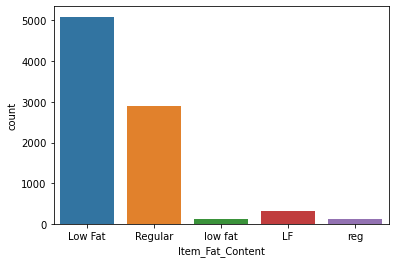

In [9]:
sns.countplot(x='Item_Fat_Content',data=train_data)

In [10]:
#Renaming values for proper ecaluation
def clean_col(col):
    if(col=="low fat" or col=="LF"):
        return "Low Fat"
    elif(col=="reg"):
        return "Regular"
    else:
        return col

In [11]:
train_data['Item_Fat_Content']=train_data['Item_Fat_Content'].apply(clean_col)

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

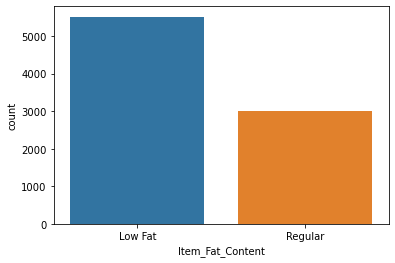

In [12]:
sns.countplot(x='Item_Fat_Content',data=train_data)

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

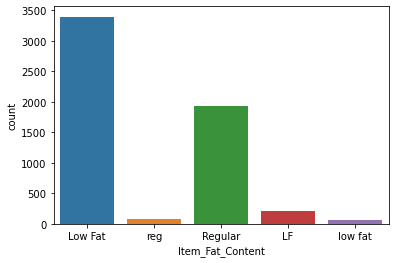

In [13]:
sns.countplot(x='Item_Fat_Content',data=test_data)

In [14]:
test_data['Item_Fat_Content']=test_data['Item_Fat_Content'].apply(clean_col)

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

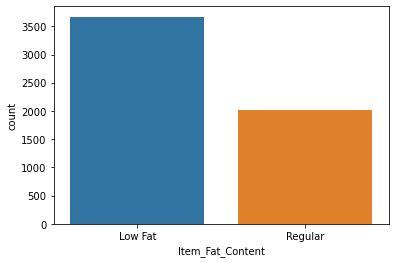

In [15]:
sns.countplot(x='Item_Fat_Content',data=test_data)

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

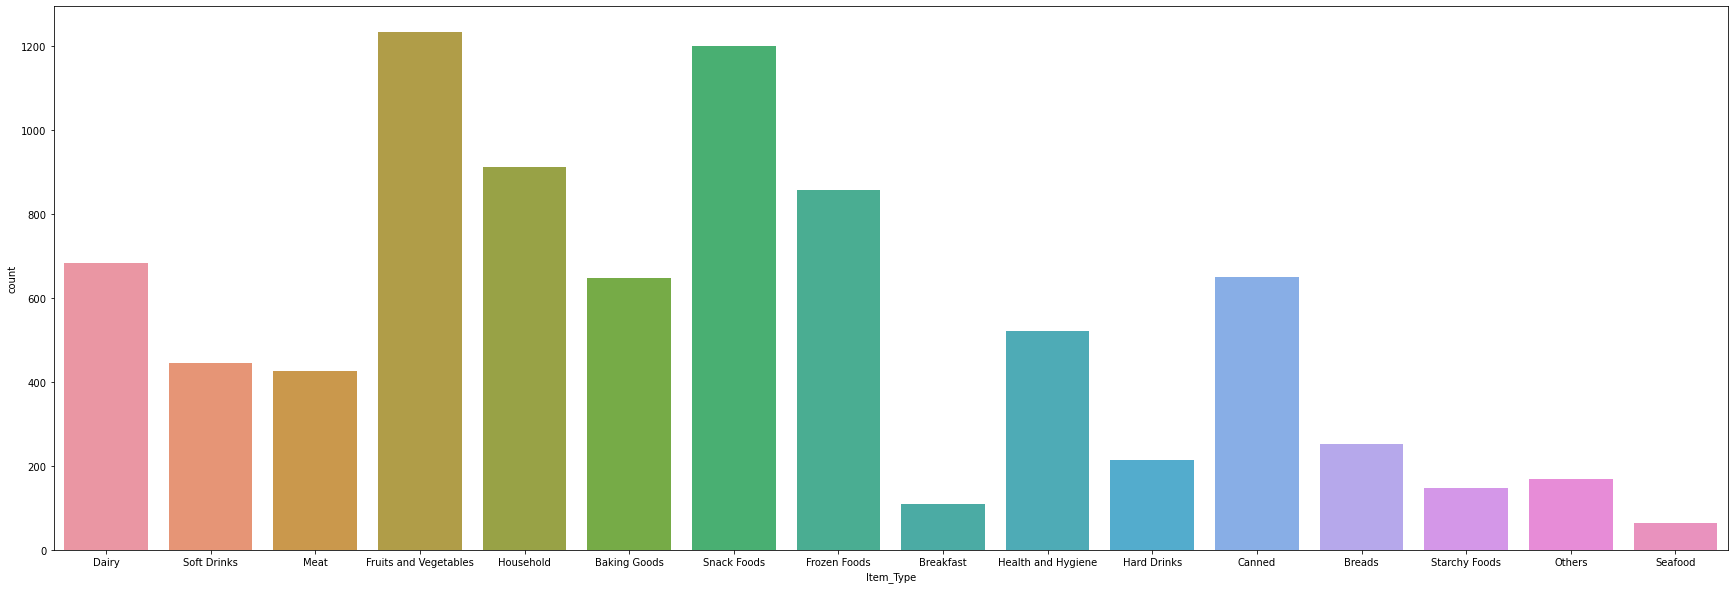

In [16]:
#Counting different products
plt.figure(figsize=(30,10))
sns.countplot(x='Item_Type',data=train_data)

<AxesSubplot:>

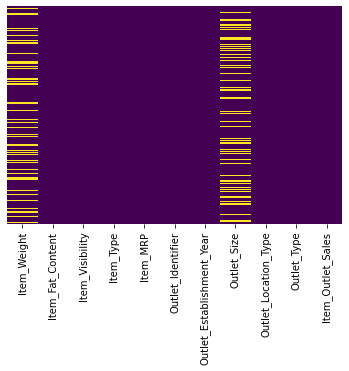

In [17]:
#Checking for null values
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [18]:
train_data.drop('Outlet_Identifier',axis=1,inplace=True)
test_data.drop('Outlet_Identifier',axis=1,inplace=True)

<AxesSubplot:>

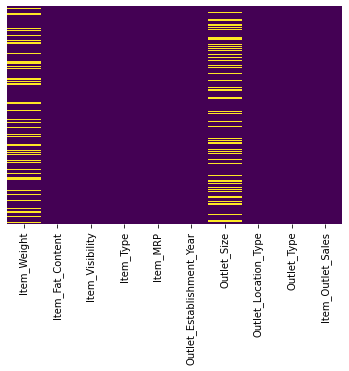

In [19]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Item_Type', ylabel='Item_Weight'>

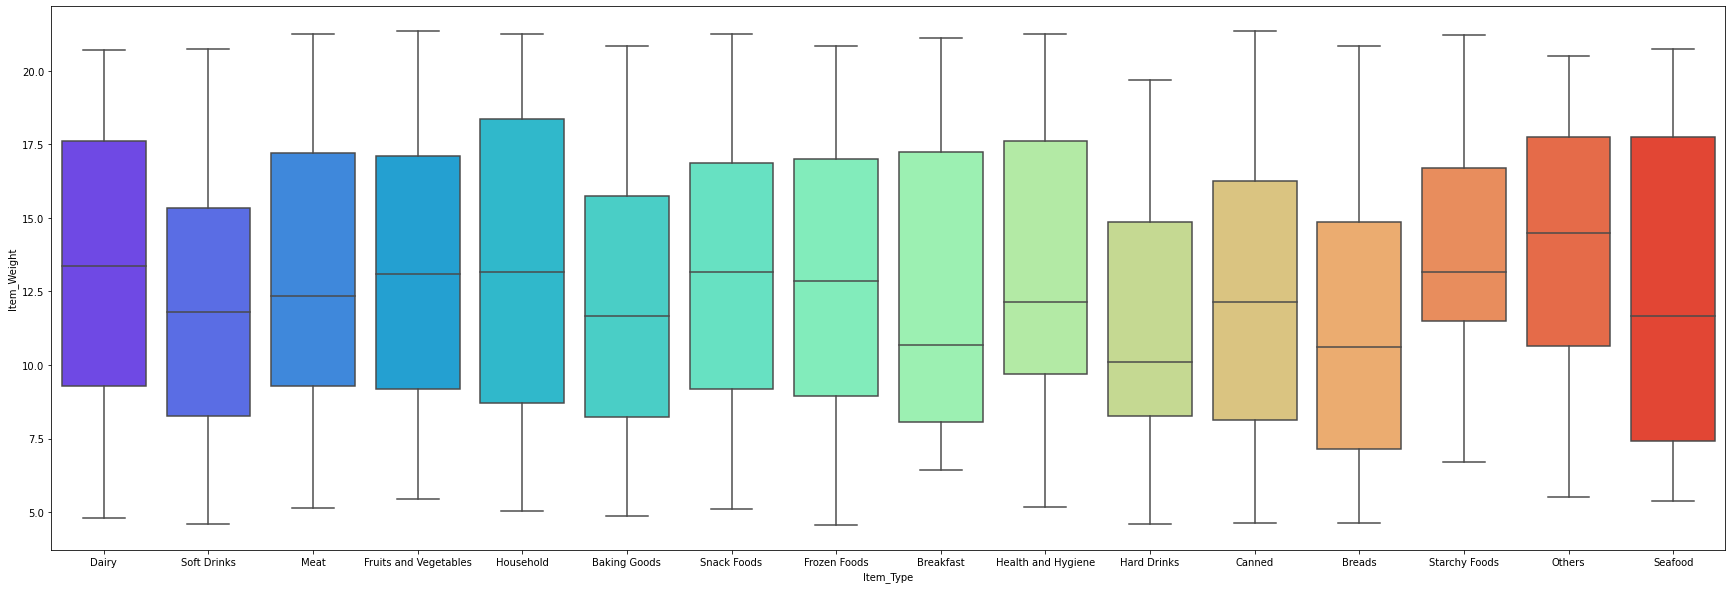

In [20]:
# Checking for outliers
plt.figure(figsize=(30,10))
sns.boxplot(x="Item_Type", y="Item_Weight", data=train_data,palette='rainbow')

In [21]:
train_data.groupby('Item_Type').mean()['Item_Weight']

Item_Type
Baking Goods             12.277108
Breads                   11.346936
Breakfast                12.768202
Canned                   12.305705
Dairy                    13.426069
Frozen Foods             12.867061
Fruits and Vegetables    13.224769
Hard Drinks              11.400328
Health and Hygiene       13.142314
Household                13.384736
Meat                     12.817344
Others                   13.853285
Seafood                  12.552843
Snack Foods              12.987880
Soft Drinks              11.847460
Starchy Foods            13.690731
Name: Item_Weight, dtype: float64

In [22]:
def fill_null(row):
    if(pd.isnull(row['Item_Weight'])):
        row['Item_Weight']=train_data.groupby('Item_Type').mean()['Item_Weight'][row['Item_Type']]
        return row
    else:
        return row

In [23]:
train_data = train_data.apply(fill_null,axis=1)

<AxesSubplot:>

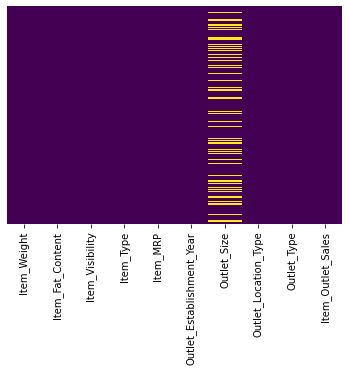

In [24]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

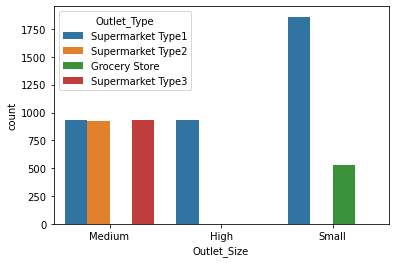

In [25]:
sns.countplot(x='Outlet_Size',data=train_data,hue='Outlet_Type')

In [26]:
def fill_size(row):
    if(pd.isnull(row['Outlet_Size'])):
        if(row['Outlet_Type']=="Supermarket Type1"):
            row['Outlet_Size']="Small"
            return row
        elif(row['Outlet_Type']=="Supermarket Type2"):
            row['Outlet_Size']="Medium"
            return row
        elif(row['Outlet_Type']=="Supermarket Type3"):
            row['Outlet_Size']="Medium"
            return row
        else:
            row['Outlet_Size']="Small"
            return row
    else:
       return row

In [27]:
train_data = train_data.apply(fill_size,axis=1)

<AxesSubplot:>

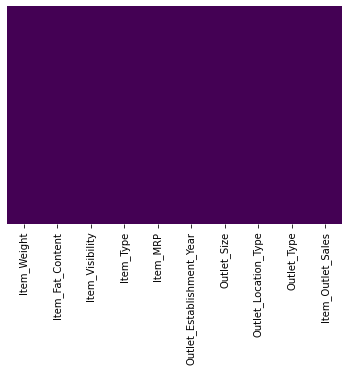

In [28]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

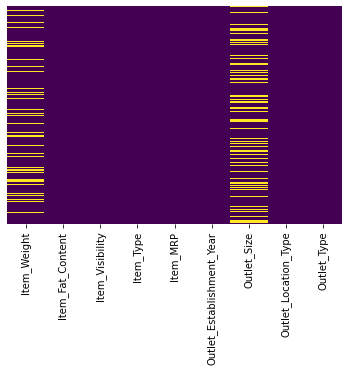

In [29]:
sns.heatmap(test_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [30]:
def fill_null2(row):
    if(pd.isnull(row['Item_Weight'])):
        row['Item_Weight']=test_data.groupby('Item_Type').mean()['Item_Weight'][row['Item_Type']]
        return row
    else:
        return row

In [31]:
test_data = test_data.apply(fill_null2,axis=1)

<AxesSubplot:>

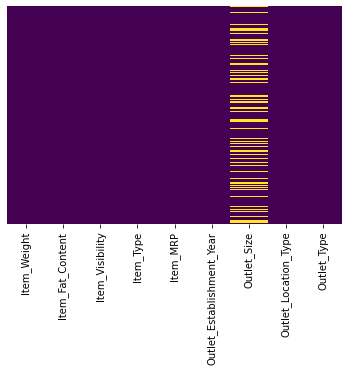

In [32]:
sns.heatmap(test_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

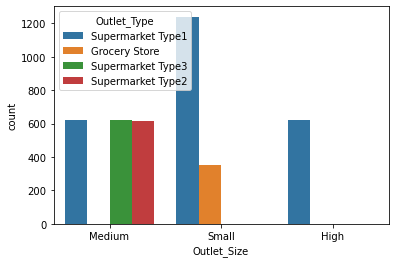

In [33]:
sns.countplot(x='Outlet_Size',data=test_data,hue='Outlet_Type')

In [34]:
def fill_size2(row):
    if(pd.isnull(row['Outlet_Size'])):
        if(row['Outlet_Type']=="Supermarket Type1"):
            row['Outlet_Size']="Small"
            return row
        elif(row['Outlet_Type']=="Supermarket Type2"):
            row['Outlet_Size']="Medium"
            return row
        elif(row['Outlet_Type']=="Supermarket Type3"):
            row['Outlet_Size']="Medium"
            return row
        else:
            row['Outlet_Size']="Small"
            return row
    else:
       return row

In [35]:
test_data = test_data.apply(fill_size2,axis=1)

<AxesSubplot:>

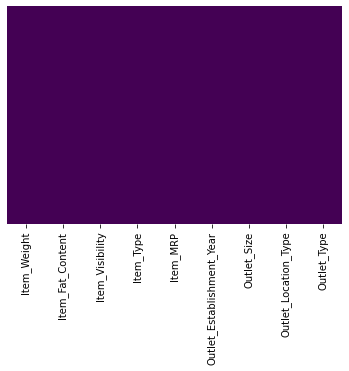

In [36]:
sns.heatmap(test_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [37]:
#Splitting the Item_type to different columns
data_types = train_data.dtypes
for cols in train_data.columns:
    if data_types[cols]==data_types['Item_Type']:
        temp = pd.get_dummies(train_data[cols],drop_first=True)
        train_data.drop(cols,axis=1,inplace=True)
        train_data = pd.concat([train_data,temp],axis=1)
#data.head()

In [38]:
train_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Regular,Breads,Breakfast,Canned,Dairy,...,Snack Foods,Soft Drinks,Starchy Foods,Medium,Small,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,1,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [39]:
train_data.shape

(8523, 28)

In [40]:
data_types = test_data.dtypes
for cols in test_data.columns:
    if data_types[cols]==data_types['Item_Type']:
        temp = pd.get_dummies(test_data[cols],drop_first=True)
        test_data.drop(cols,axis=1,inplace=True)
        test_data = pd.concat([test_data,temp],axis=1)

In [41]:
test_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Regular,Breads,Breakfast,Canned,Dairy,Frozen Foods,...,Snack Foods,Soft Drinks,Starchy Foods,Medium,Small,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,20.75000,0.007565,107.8622,1999,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
1,8.30000,0.038428,87.3198,2007,1,0,0,0,1,0,...,0,0,0,0,1,1,0,1,0,0
2,14.60000,0.099575,241.7538,1998,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,7.31500,0.015388,155.0340,2007,0,0,0,0,0,0,...,1,0,0,0,1,1,0,1,0,0
4,12.95504,0.118599,234.2300,1985,1,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1


In [42]:
test_data.shape

(5681, 27)

# Models

In [43]:
# X_train = train_data.drop('Item_Outlet_Sales',axis=1)
# y_train = train_data['Item_Outlet_Sales']
# print("Training Accuracy for Decision Tree regressor :", regr.score(X_train, y_train)*100,"%")

In [44]:
X = train_data.drop('Item_Outlet_Sales',axis=1)
y = train_data['Item_Outlet_Sales']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## KNN 
In regression problems, the KNN algorithm will predict a new data point’s continuous value by returning the average of the k neighbours’ values.

In [45]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X, y)

KNeighborsRegressor(n_neighbors=2)

In [46]:
y_pre=neigh.predict(X_test)

In [47]:
metrics.r2_score(y_pre,y_test)*100

<IPython.core.display.Javascript object>

74.48962376780143

In [71]:
mse = mean_squared_error(y_pre,y_test)

rmse = sqrt(mse)

In [72]:
rmse

800.7500755357754

In [78]:
MAE = mean_absolute_error(y_test,y_pre)
MAE

556.073231260997

## Decision Tree
Decision trees in Python can be used to solve both classification and regression problems—they are frequently used in determining odds

In [48]:
from sklearn.tree import DecisionTreeRegressor
regr = DecisionTreeRegressor(max_depth=17, random_state = 0)
regr.fit(train_data.drop('Item_Outlet_Sales',axis=1),train_data['Item_Outlet_Sales'])

DecisionTreeRegressor(max_depth=17, random_state=0)

In [49]:
predictions = regr.predict(test_data)

In [50]:
pd.Series(predictions)

0       1890.539100
1       1321.249836
2        639.833800
3       2025.363600
4       7170.666000
           ...     
5676    3829.015800
5677    1812.640500
5678     361.529400
5679    6471.576000
5680    1151.594312
Length: 5681, dtype: float64

In [51]:
regr.fit(X,y)

DecisionTreeRegressor(max_depth=17, random_state=0)

In [52]:
y_pred = regr.predict(X_test)
y_pred

array([ 881.65236   , 3354.55647692, 2577.53373333, ..., 3791.50906667,
       2429.31397143, 5243.8408    ])

In [53]:
metrics.r2_score(y_test,y_pred)*100

<IPython.core.display.Javascript object>

90.27338369033953

In [62]:
mse = mean_squared_error(y_test,y_pred)

rmse = sqrt(mse)

In [63]:
rmse

534.6503094835136

In [79]:
MAE = mean_absolute_error(y_test,y_pred)
MAE

266.8520567228232

## Random forest
Random Forest is a powerful and versatile supervised machine learning algorithm that grows and combines multiple decision trees to create a “forest.” It can be used for both classification and regression problems.

In [54]:
from sklearn.ensemble import RandomForestRegressor

In [55]:
regressor = RandomForestRegressor(n_estimators=100,random_state=0)

In [56]:
regressor.fit(X,y)

RandomForestRegressor(random_state=0)

In [57]:
y_predictions = regressor.predict(X_test)
y_predictions

array([ 858.389308, 3345.538472, 2608.923984, ..., 3972.36254 ,
       2905.691018, 4686.479646])

In [58]:
metrics.r2_score(y_test,y_predictions)*100

<IPython.core.display.Javascript object>

93.86307125585992

In [59]:
from sklearn.metrics import mean_squared_error

from math import sqrt

In [60]:
mse = mean_squared_error(y_test,y_predictions)

rmse = sqrt(mse)

In [61]:
rmse

424.68260310417867

In [67]:
from sklearn.metrics import mean_absolute_error

In [80]:
MAE = mean_absolute_error(y_test,y_predictions)
MAE


295.82644018181827

# Conclusion

After a whole lot of preprocessiong we were finally able to develop a dataset which was good enough for our model to run. We didn't explain anything step wise but a lot of it is self explanatory. Output might not be same all the time you run the code. It may go up or down. In the real world scenario, we save the model as soon we get the highest accuracy.